# Import thư viện

In [2]:
# Thư viện cơ bản
import numpy as np
import pandas as pd

# Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

# Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns   

# Thư viện tiền xử lý dữ liệu, tối ưu hóa mô hình
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer

# Thư viện xây dựng mô hình
from sklearn.linear_model import LogisticRegression

# Thư viện đánh giá mô hình
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, make_scorer, recall_score, ConfusionMatrixDisplay, precision_score

df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df['Potability'].value_counts()
# 0 - Không uống được
# 1 - Uống được

Potability
0    1998
1    1278
Name: count, dtype: int64

# Tiền xử lý dữ liệu

In [5]:
df.isnull().sum()[df.isnull().sum() > 0] / len(df) * 100

ph                 14.987790
Sulfate            23.840049
Trihalomethanes     4.945055
dtype: float64

In [6]:
df[df['Potability'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1684.0,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.0,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.0,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.0,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.0,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.0,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.0,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.0,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.0,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df[df['Potability'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1101.0,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.0,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.0,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.0,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.0,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.0,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.0,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.0,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.0,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Xem trung bình, trung vị của 3 cột có giá trị null
print(df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()) 
print('\n')
print(df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median())

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64


In [9]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()
print('\n')
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [10]:
for cols in df.columns:
    iqr = df[cols].quantile(0.75) - df[cols].quantile(0.25)
    lower_bound = df[cols].quantile(0.25) - (1.5 * iqr)
    upper_bound = df[cols].quantile(0.75) + (1.5 * iqr)
    df[cols] = np.where(df[cols] > upper_bound, upper_bound, df[cols])
    df[cols] = np.where(df[cols] < lower_bound, lower_bound, df[cols])

# Chia train test


In [11]:
X = df.drop('Potability',axis=1)
y = df['Potability']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Điền null

In [13]:
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()

# Tạo dict lưu các imputer đã fit theo nhãn
imputers = {}

# Train
for label_value in [0, 1]:
    group_train_idx = y_train[y_train == label_value].index
    group_train = X_train.loc[group_train_idx]

    imputer = KNNImputer(n_neighbors=5)
    imputed = imputer.fit_transform(group_train)
    imputers[label_value] = imputer

    X_train_filled.loc[group_train_idx] = pd.DataFrame(
        imputed, columns=X_train.columns, index=group_train_idx
    )

# Test
for label_value in [0, 1]:
    group_test_idx = y_test[y_test == label_value].index
    group_test = X_test.loc[group_test_idx]

    imputer = imputers[label_value]
    imputed = imputer.transform(group_test)

    X_test_filled.loc[group_test_idx] = pd.DataFrame(
        imputed, columns=X_test.columns, index=group_test_idx
    )

In [14]:
print(X_train_filled.isnull().sum()[X_train_filled.isnull().sum() > 0])
print(X_test_filled.isnull().sum()[X_test_filled.isnull().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [15]:
X_train_filled.shape, X_test_filled.shape

((2293, 9), (983, 9))

In [16]:
# Biến đầu vào
X_train_filled.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

## Chuẩn hóa

In [17]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_filled), columns=X_train_filled.columns, index=X_train_filled.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_filled), columns=X_test_filled.columns, index=X_test_filled.index)

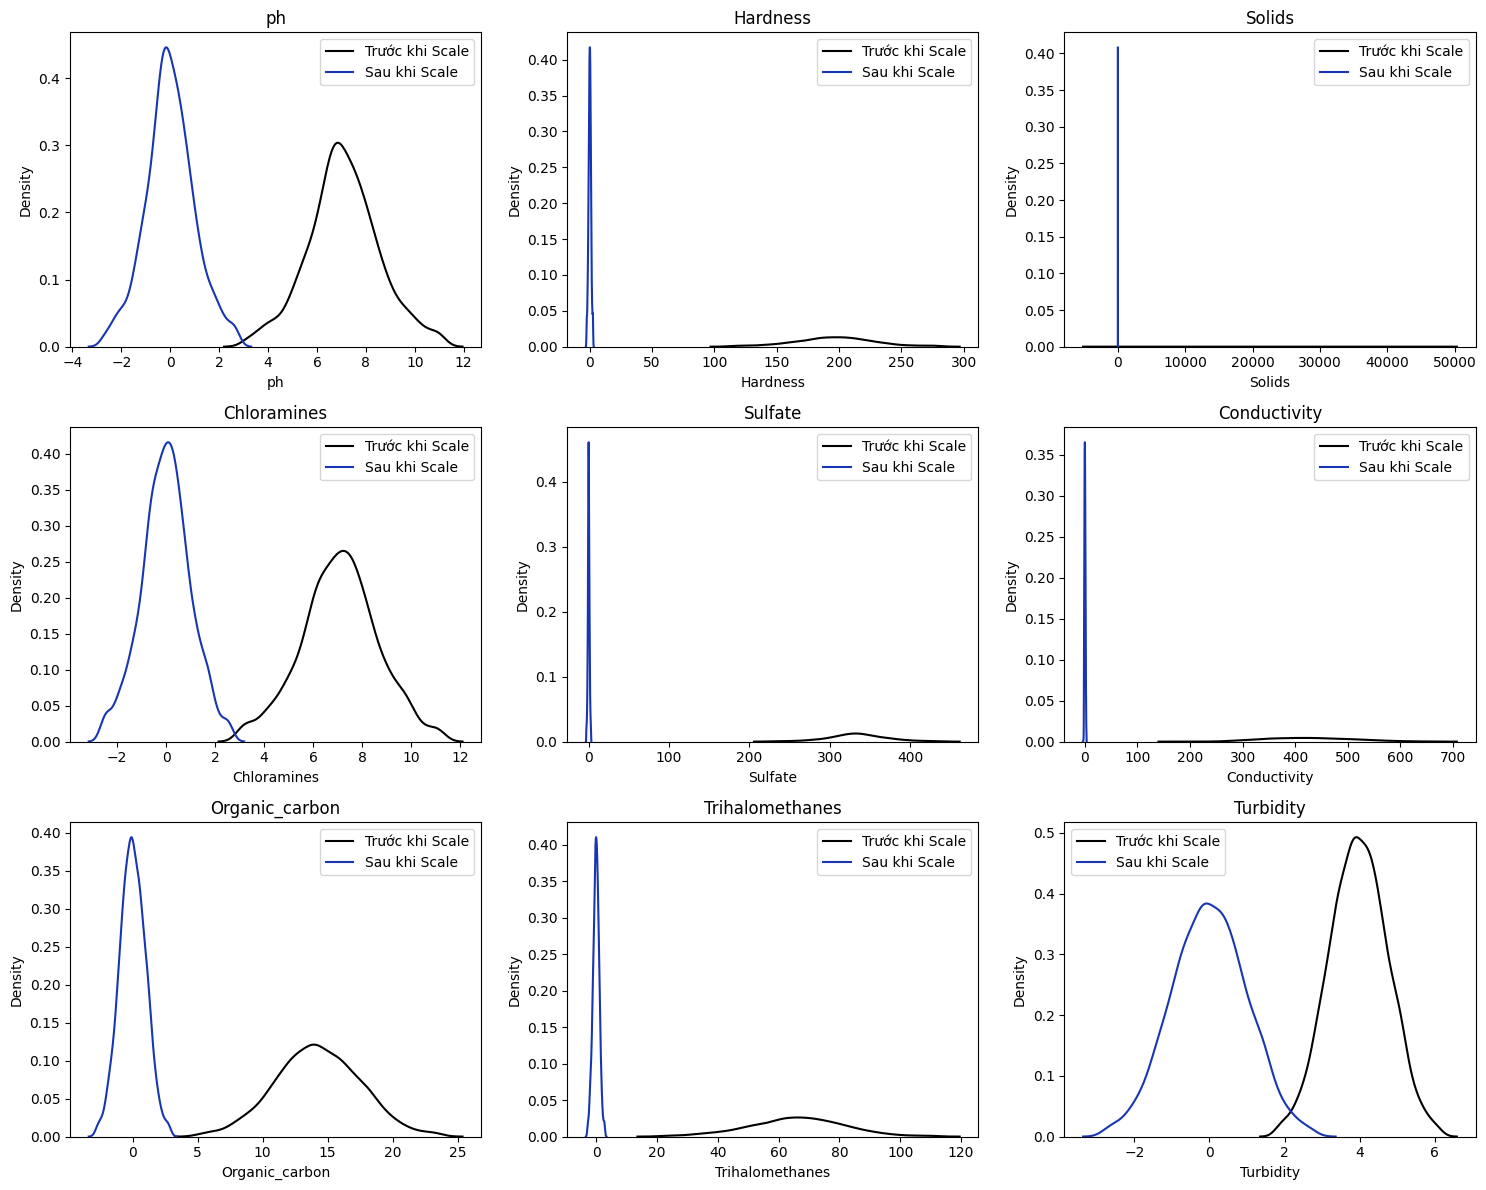

In [18]:
# Biểu đồ phân phối trước và sau khi scale của tập train
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten() 

for i, col in enumerate(X_train_filled.columns):
    ax = axes[i]
    
    # Trước khi scale
    sns.kdeplot(X_train_filled[col], ax=ax, color='#000000', label='Trước khi Scale')

    # Sau khi scale
    sns.kdeplot(X_train_scaled[col], ax=ax, color='#1836B2', label='Sau khi Scale')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

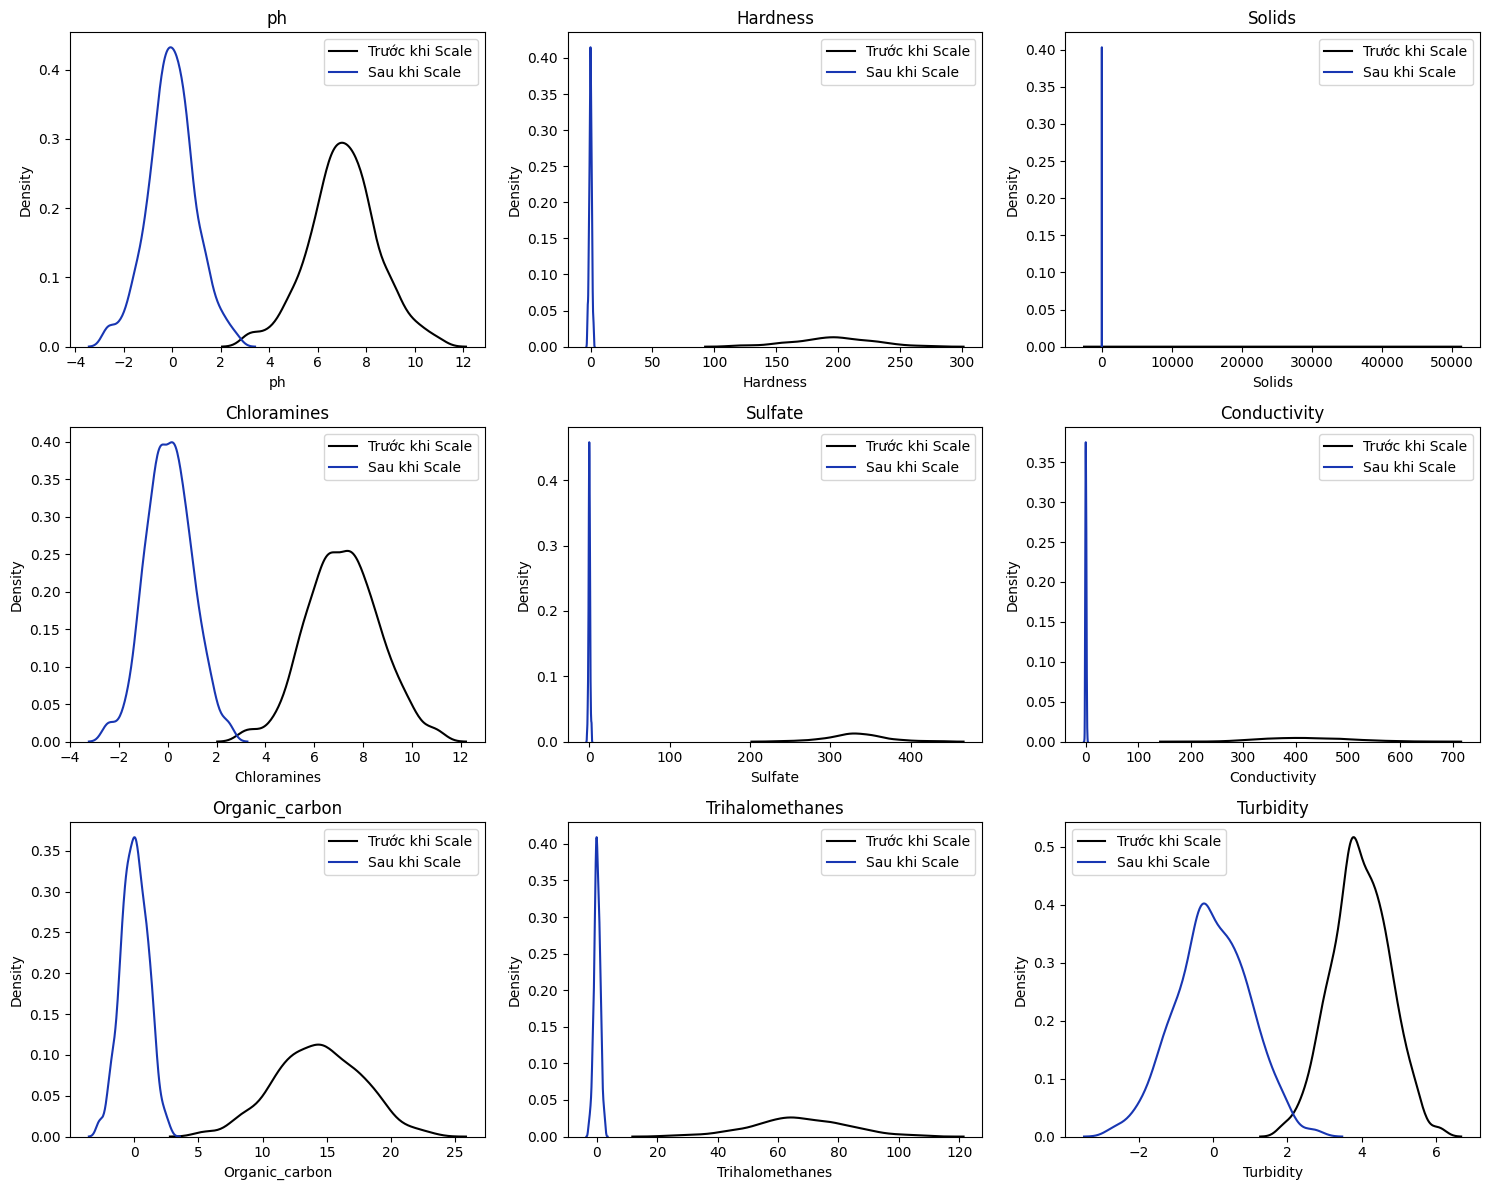

In [19]:
# Biểu đồ phân phối trước và sau khi scale của tập test
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten() 

for i, col in enumerate(X_test_filled.columns):
    ax = axes[i]
    
    # Trước khi scale
    sns.kdeplot(X_test_filled[col], ax=ax, color='#000000', label='Trước khi Scale')

    # Sau khi scale
    sns.kdeplot(X_test_scaled[col], ax=ax, color='#1836B2', label='Sau khi Scale')
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

# Chạy mô hình

In [20]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [21]:
y_pred = lr.predict(X_test_scaled)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       600
         1.0       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



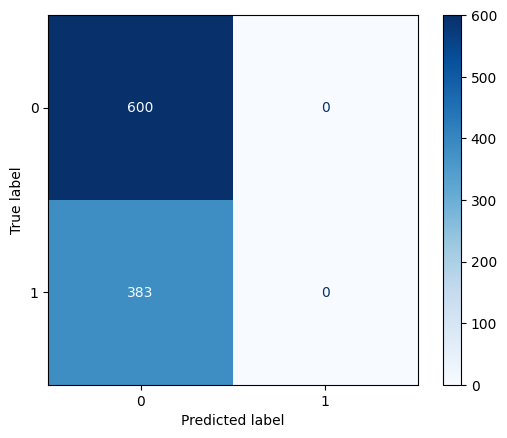

In [23]:
cm = confusion_matrix(y_test, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
display_cm.plot(cmap='Blues')

# Tối ưu mô hình

In [24]:
def compute_inverse_class_weights(label_col):
    counter = Counter(label_col)
    total = sum(counter.values())
    
    class_freq = {cls: count / total for cls, count in counter.items()}
    
    max_freq = max(class_freq.values())
    class_weights = {cls: round(max_freq / freq, 2) for cls, freq in class_freq.items()}
    
    return class_weights

weights = compute_inverse_class_weights(y_train)
weights

{1.0: 1.56, 0.0: 1.0}

In [25]:
param = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ['liblinear', 'saga'],
    "max_iter": [100, 200, 300],
    "class_weight": [None, weights]
}

scoring=make_scorer(precision_score, pos_label=1)

In [26]:
grid = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param,
    scoring=scoring,
    cv=5,                                                 
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, {0.0: 1.0, 1.0: 1.56}],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(precision_score, response_method='predict', pos_label=1),
             verbose=1)

In [27]:
grid.best_params_

{'C': 1,
 'class_weight': {1.0: 1.56, 0.0: 1.0},
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [28]:
y_proba = grid.predict_proba(X_test_scaled)[:, 1]

In [29]:
# Tạo 1 chuỗi threshold (ngưỡng) từ 0.0 đến 1.0, bước nhảy 0.01
threshold = np.arange(0.0, 1.01, 0.01)

# 1 mảng lưu kết quả từ confusion matrix (ma trận nhầm lẫn)
res = []

for t in threshold:
    y_pred = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    res.append((t, fp, fn, tp, tn))

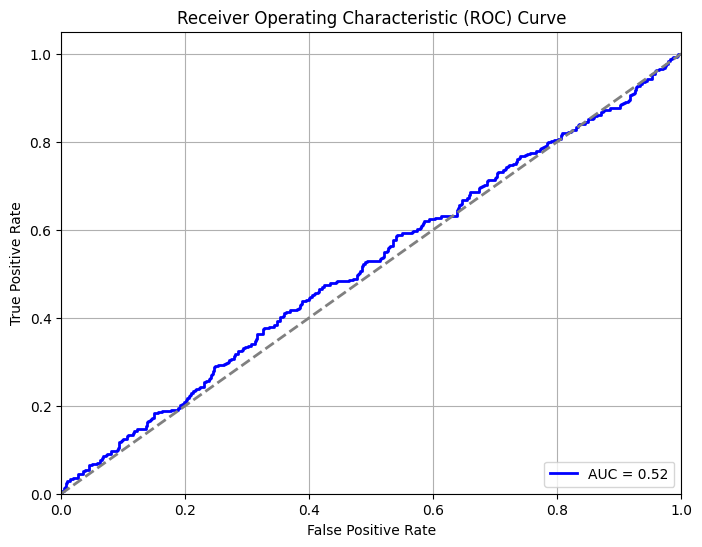

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # đường random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [31]:
df_thresh = pd.DataFrame(res, columns=['Threshold', 'FP', 'FN', 'TP', 'TN'])
df_thresh['Precision'] = df_thresh['TP'] / (df_thresh['TP'] + df_thresh['FP'])
df_thresh['Recall'] = df_thresh['TP'] / (df_thresh['TP'] + df_thresh['FN'])

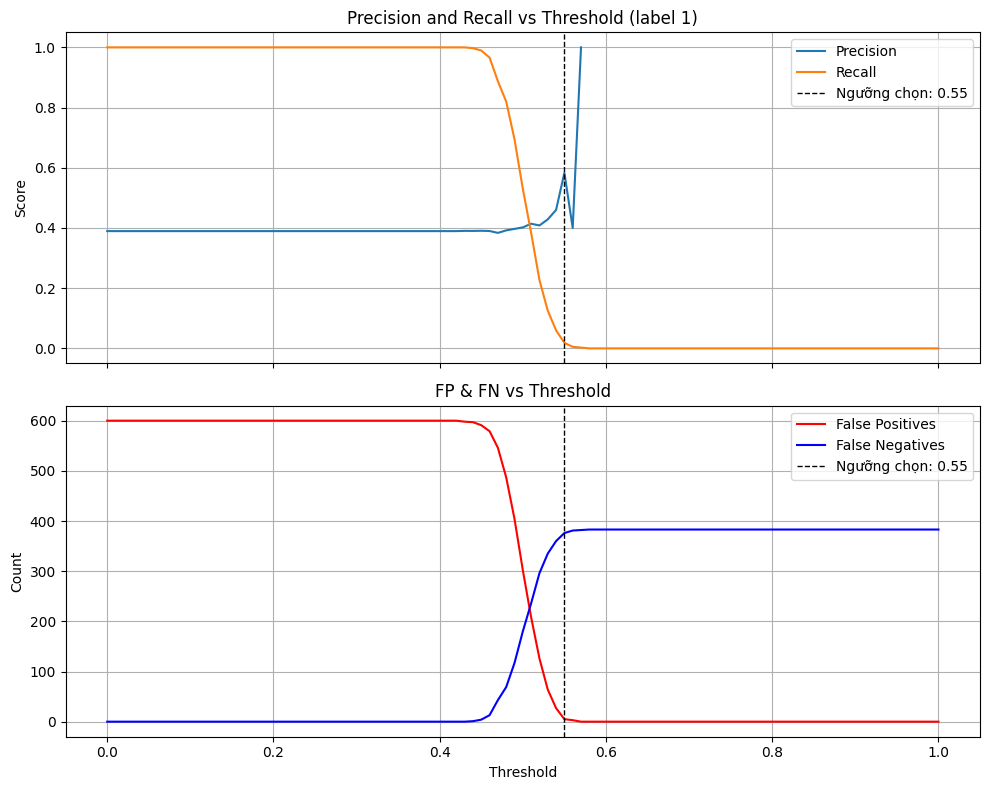

In [32]:
# Ngưỡng đã chọn
chosen_threshold = 0.55

# Tạo subplot với 2 hàng, 1 cột
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True) # sharex để cùng trục x

# --- Biểu đồ thứ nhất: Precision and Recall vs Threshold (label 1) ---
axs[0].plot(threshold, df_thresh['Precision'], label='Precision')
axs[0].plot(threshold, df_thresh['Recall'], label='Recall')
axs[0].axvline(x=chosen_threshold, color='black', linestyle='--', linewidth=1, label=f'Ngưỡng chọn: {chosen_threshold}')
axs[0].set_title('Precision and Recall vs Threshold (label 1)')
axs[0].set_ylabel('Score')
axs[0].grid(True)
axs[0].legend()

# --- Biểu đồ thứ hai: FP & FN vs Threshold ---
fp = df_thresh['FP']
fn = df_thresh['FN']
axs[1].plot(threshold, fp, color='red', label='False Positives')
axs[1].plot(threshold, fn, color='blue', label='False Negatives')
axs[1].axvline(x=chosen_threshold, color='black', linestyle='--', linewidth=1, label=f'Ngưỡng chọn: {chosen_threshold}')
axs[1].set_title('FP & FN vs Threshold')
axs[1].set_xlabel('Threshold')
axs[1].set_ylabel('Count')
axs[1].grid(True)
axs[1].legend()

# Điều chỉnh layout để tránh chồng lấn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [33]:
# In ra confusion matrix & classification report theo nhiều threshold khác nhau
for t in threshold:
    print(f"Threshold: {t:.2f}")
    y_pred = (y_proba >= t).astype(int)
    print(confusion_matrix(y_test, y_pred), '\n')

Threshold: 0.00
[[  0 600]
 [  0 383]] 

Threshold: 0.01
[[  0 600]
 [  0 383]] 

Threshold: 0.02
[[  0 600]
 [  0 383]] 

Threshold: 0.03
[[  0 600]
 [  0 383]] 

Threshold: 0.04
[[  0 600]
 [  0 383]] 

Threshold: 0.05
[[  0 600]
 [  0 383]] 

Threshold: 0.06
[[  0 600]
 [  0 383]] 

Threshold: 0.07
[[  0 600]
 [  0 383]] 

Threshold: 0.08
[[  0 600]
 [  0 383]] 

Threshold: 0.09
[[  0 600]
 [  0 383]] 

Threshold: 0.10
[[  0 600]
 [  0 383]] 

Threshold: 0.11
[[  0 600]
 [  0 383]] 

Threshold: 0.12
[[  0 600]
 [  0 383]] 

Threshold: 0.13
[[  0 600]
 [  0 383]] 

Threshold: 0.14
[[  0 600]
 [  0 383]] 

Threshold: 0.15
[[  0 600]
 [  0 383]] 

Threshold: 0.16
[[  0 600]
 [  0 383]] 

Threshold: 0.17
[[  0 600]
 [  0 383]] 

Threshold: 0.18
[[  0 600]
 [  0 383]] 

Threshold: 0.19
[[  0 600]
 [  0 383]] 

Threshold: 0.20
[[  0 600]
 [  0 383]] 

Threshold: 0.21
[[  0 600]
 [  0 383]] 

Threshold: 0.22
[[  0 600]
 [  0 383]] 

Threshold: 0.23
[[  0 600]
 [  0 383]] 

Threshold: 0.24


In [34]:
y_pred_best = (y_proba >= 0.55).astype(int)

In [35]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

         0.0       0.61      0.99      0.76       600
         1.0       0.58      0.02      0.04       383

    accuracy                           0.61       983
   macro avg       0.60      0.50      0.40       983
weighted avg       0.60      0.61      0.48       983



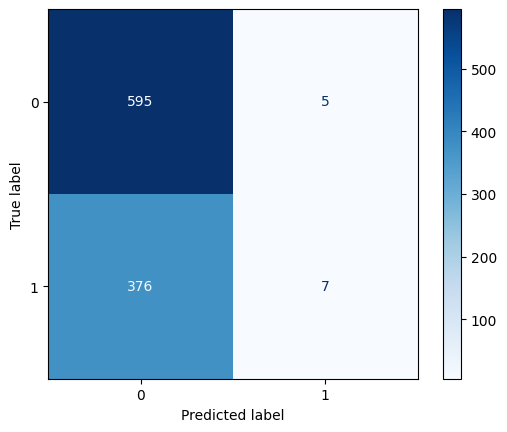

In [36]:
cm_best = confusion_matrix(y_test, y_pred_best)
display_cm_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
display_cm_best.plot(cmap='Blues')

# Kiểm tra độ quan trọng của thuộc tính đến mô hình

In [37]:
# Lấy tên các cột từ DataFrame gốc để dễ dàng liên kết với các hệ số
feature_names = X.columns

# Lấy các hệ số từ mô hình
# Đối với phân loại nhị phân, coef_ sẽ là một mảng 2D (1, n_features),
# chúng ta chỉ cần lấy hàng đầu tiên.
coefficients = grid.best_estimator_.coef_[0]

# Tạo một DataFrame để dễ dàng xem xét
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sắp xếp các thuộc tính theo giá trị tuyệt đối của hệ số
# Giá trị tuyệt đối lớn hơn cho thấy ảnh hưởng mạnh hơn (dù là tích cực hay tiêu cực)
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients_df)

           Feature  Coefficient  Abs_Coefficient
2           Solids     0.059953         0.059953
3      Chloramines     0.052315         0.052315
6   Organic_carbon    -0.034254         0.034254
4          Sulfate     0.032628         0.032628
7  Trihalomethanes     0.026963         0.026963
0               ph     0.015922         0.015922
1         Hardness     0.009438         0.009438
5     Conductivity     0.007468         0.007468
8        Turbidity     0.007336         0.007336


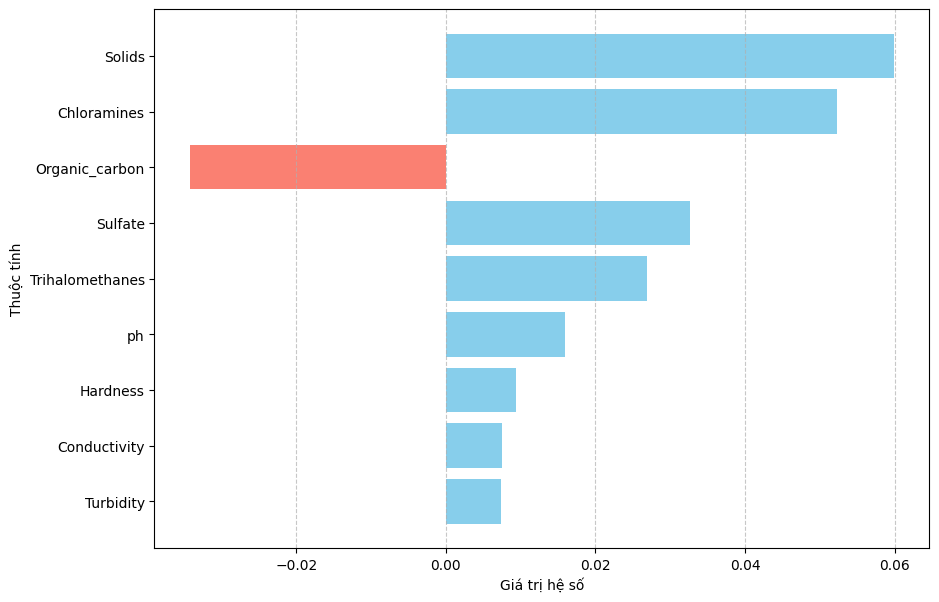

In [39]:
plt.figure(figsize=(10, 7))
# plt.barh để vẽ biểu đồ cột ngang
# Sử dụng 'Coefficient' để thấy cả chiều tác động (dương/âm)
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'],
         color=['skyblue' if c > 0 else 'salmon' for c in coefficients_df['Coefficient']])

plt.xlabel('Giá trị hệ số')
plt.ylabel('Thuộc tính')
plt.gca().invert_yaxis() # Đảo ngược trục y để thuộc tính có ảnh hưởng lớn nhất ở trên cùng
plt.grid(axis='x', linestyle='--', alpha=0.7) # Thêm lưới trục x
plt.show()